In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import integrate
from scipy.stats import norm 
from scipy.stats import beta
import matplotlib.animation as anim

In [9]:
def f(x):
    return beta.pdf(x,2,4)
    #return norm.pdf(x,0,1)

In [10]:
I = integrate.quad(f,-np.inf,np.inf)
I

(1.0000000000000002, 1.498540021943346e-09)

In [11]:
a = 0
b = 1 

In [12]:
x = np.linspace(a,b,1000)
y = f(x)
Max = np.max(y)
Max

2.109373591560077

In [13]:
N = int(1e5)
Points = np.array([0,0])
Integral = np.array([])
Aceptado = 0

for i in tqdm(range(N)):
    
    xi = np.random.uniform(a,b)
    yi = np.random.uniform(0,Max)
    
    if yi < f(xi):
        Aceptado += 1
        Fraction = Aceptado/N
        Int = Fraction*Max*(b-a)
        
        Points = np.vstack((Points,[xi,yi]))
        Integral = np.append(Integral,Int)
        
print(Fraction,Int)

100%|█████████████████████████████████████████████████████| 100000/100000 [00:53<00:00, 1858.25it/s]

0.47312 0.9979868336389036


<IPython.core.display.Javascript object>


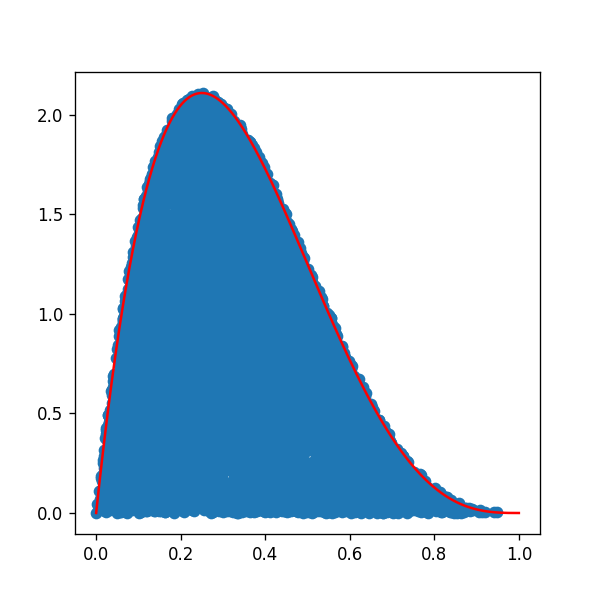

In [14]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)

def init():
    
    ax1.clear()
    
def Update(i):
    
    init()
    j = int(100*i)
    
    ax1.plot(x,y,color='r')
    ax1.scatter(Points[:,0][:j],Points[:,1][:j])
    
Animation = anim.FuncAnimation(fig,Update,frames=int(N/1000+1),init_func=init)